In [3]:
import sys
sys.path.append("..")
import json
import numpy as np
import random
import os
import time
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from pandas.core.frame import DataFrame
import numpy as np
import csv

In [4]:
target_values = [1, 0, 1, 1, 1, 0.8, 0.95]
count_violations = np.zeros((128),dtype = int)

priority_list = []
with open("priority_list.csv") as csvfile:
    csv_file = csv.reader(csvfile)
    for row in csv_file:
        priority_list.append(row[:-1])
    priority_list = [[float(x) for x in row] for row in priority_list]
priority_list = np.array(priority_list)

# file_folder_orgin = os.path.abspath(os.path.join(os.getcwd(), "..")) + "/2020_12_01_NSGA_II_results_10000"
file_folder_orgin = "D:/ASE2020-ExperimentData/GA/Overtake_2021_01_07_NSGA_III_results_20000"
# file_folder_orgin = os.path.abspath(os.path.join(os.getcwd())) + "/2020_12_26_Random_results_20000"
result_list = []
fileList = os.listdir(file_folder_orgin)
fileList.sort()
for i in range(len(fileList)):
    textname = file_folder_orgin + '/' + fileList[i]
    result = np.loadtxt(textname)
    violation_pattern = np.zeros((7), dtype = int)
    result_list.append(result)
    for j in range(len(violation_pattern)):
        if result[j] < target_values[j]:
            violation_pattern[j] = 1
        else:
            violation_pattern[j] = 0
            
    flag = 0
    for j in range (priority_list.shape[0]):
        if (np.array(violation_pattern) == priority_list[j]).all():
            flag = 1
            count_violations[j] += 1
            break
    if flag == 0:
        print(violation_pattern)
print(count_violations, count_violations.sum(), np.array(result_list).shape[0])



[    0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     2     8
     0     0     0     2     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     8     0     0     0    14     2    46     0     1     0    11
     0     0     0     0     0     0     0     0     0     3     0     0
     0     0   413  1728     0     0     0     2     0    75     0     0
     0  4400 10222  1939     0     1     0  1123] 20000 20000


In [5]:
criticality = 0
for i in range(len(count_violations)):
    criticality += count_violations[i] * (127-i)/127
    
print(criticality/count_violations.sum())

category = 0
for i in range(len(count_violations)):
    if count_violations[i] > 0:
        category += 1

print(category, category/128)

0.04904370078740158
19 0.1484375


In [6]:
sns.set_style("darkgrid")
data_result = DataFrame(result_list)
data_result.rename(columns={0:'a',1:'b',2:'c',3:'d',4:'e',5:'f',6:'g'},inplace=True)#注意这里0和1都不是字符串
data_result.dropna(axis=0,how='any')

,a,b,c,d,e,f,g
0,1.0,3.502393,1.000000,1.000000,1.000000,0.985574,0.999030
1,1.0,3.500572,1.000000,0.253689,1.000000,0.982655,0.996023
2,1.0,3.611177,1.000000,0.639158,1.000000,0.966888,0.993878
3,1.0,3.502840,1.000000,0.479494,1.000000,0.978903,0.994727
4,1.0,3.501427,1.000000,1.000000,1.000000,0.991756,0.999588
...,...,...,...,...,...,...,...
19995,1.0,4.465933,1.000000,1.000000,0.189873,0.837218,0.986764
19996,1.0,3.837058,0.811205,1.000000,1.000000,0.910461,0.979079
19997,1.0,3.646120,1.000000,1.000000,0.171053,0.893395,0.985424
19998,1.0,3.510126,1.000000,0.988224,1.000000,0.952770,0.994834


D:\Anaconda\envs\tensorflow\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


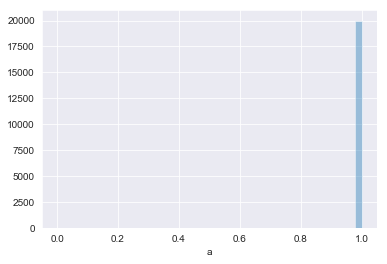

In [7]:
sns.distplot(data_result['a'],kde = False)

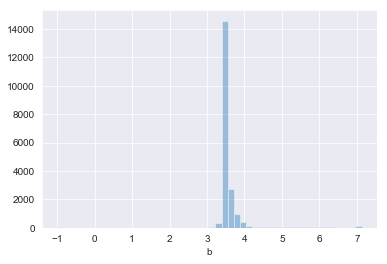

In [8]:
sns.distplot(data_result['b'],kde = False)

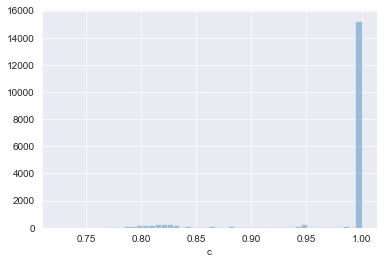

In [9]:
sns.distplot(data_result['c'],kde = False)

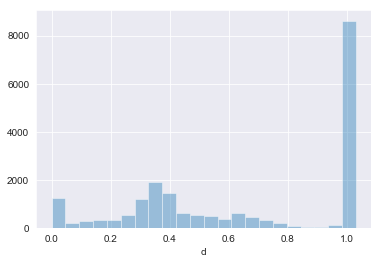

In [10]:
sns.distplot(data_result['d'],kde = False)

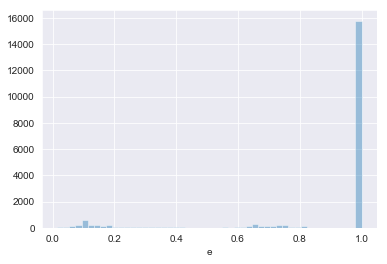

In [11]:
sns.distplot(data_result['e'],kde = False)

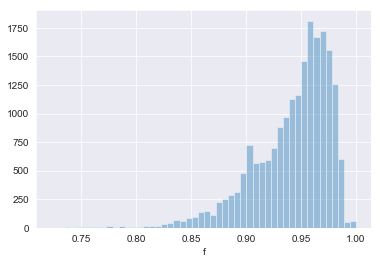

In [12]:
sns.distplot(data_result['f'],kde = False)

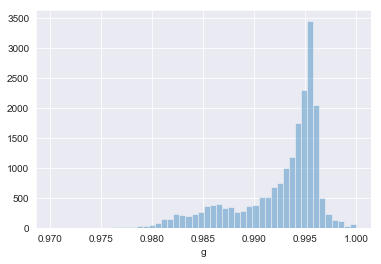

In [13]:
sns.distplot(data_result['g'],kde = False)

          a         b         c         d         e         f         g
a  1.000000 -0.068517 -0.011875 -0.018981  0.039398  0.019146  0.032132
b -0.068517  1.000000  0.016738  0.096449 -0.104460 -0.040636 -0.051928
c -0.011875  0.016738  1.000000 -0.493736 -0.183462  0.102399  0.537116
d -0.018981  0.096449 -0.493736  1.000000 -0.351111 -0.399199 -0.543071
e  0.039398 -0.104460 -0.183462 -0.351111  1.000000  0.527250  0.470627
f  0.019146 -0.040636  0.102399 -0.399199  0.527250  1.000000  0.601861
g  0.032132 -0.051928  0.537116 -0.543071  0.470627  0.601861  1.000000


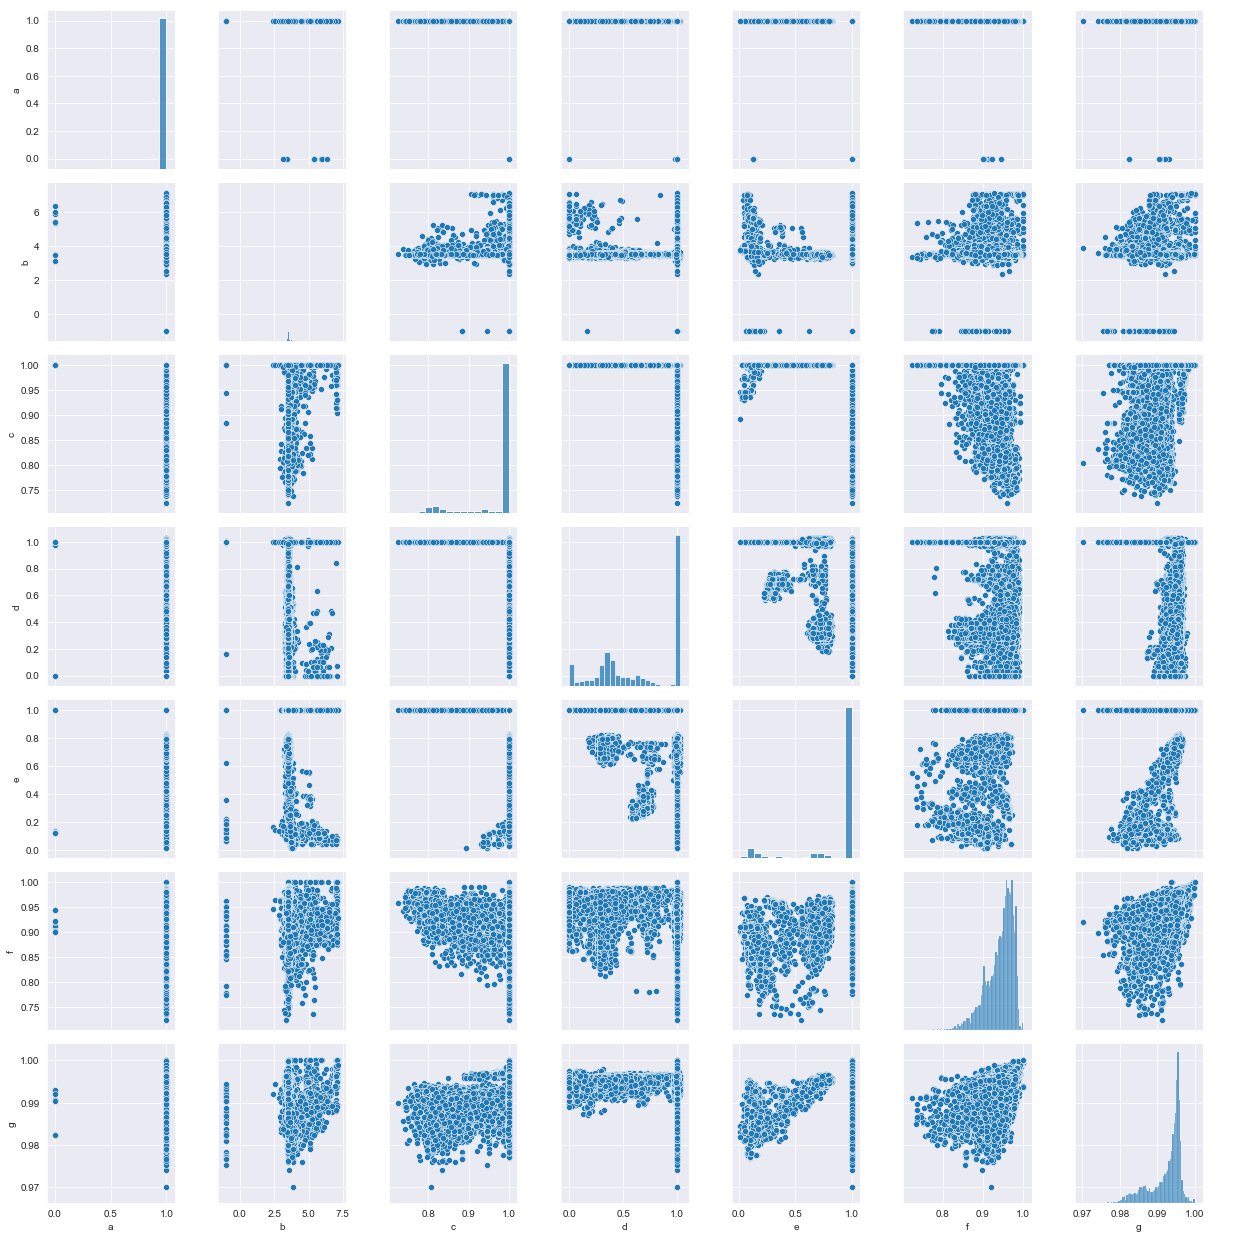

In [14]:
print(data_result.corr())
sns.pairplot(data_result)

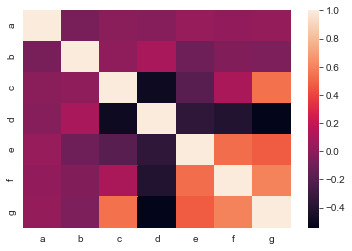

In [15]:
sns.heatmap(data_result.corr())

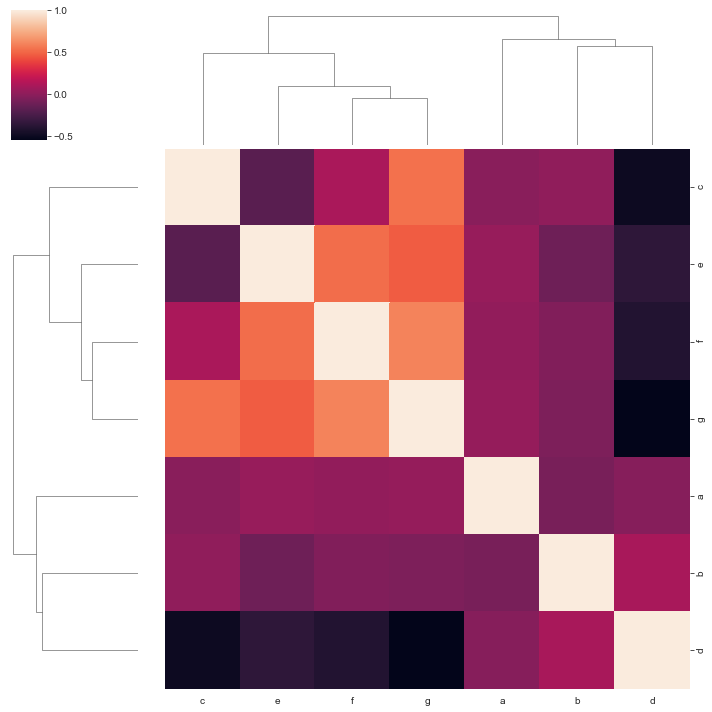

In [16]:
sns.clustermap(data_result.corr())

D:\Anaconda\envs\tensorflow\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Anaconda\envs\tensorflow\lib\site-packages\matplotlib\cbook\__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
D:\Anaconda\envs\tensorflow\lib\site-packages\matplotlib\axes\_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
D:\Anaconda\envs\tensorflow\lib\site-packages\matplotlib\axes\_base.py:239: FutureWar

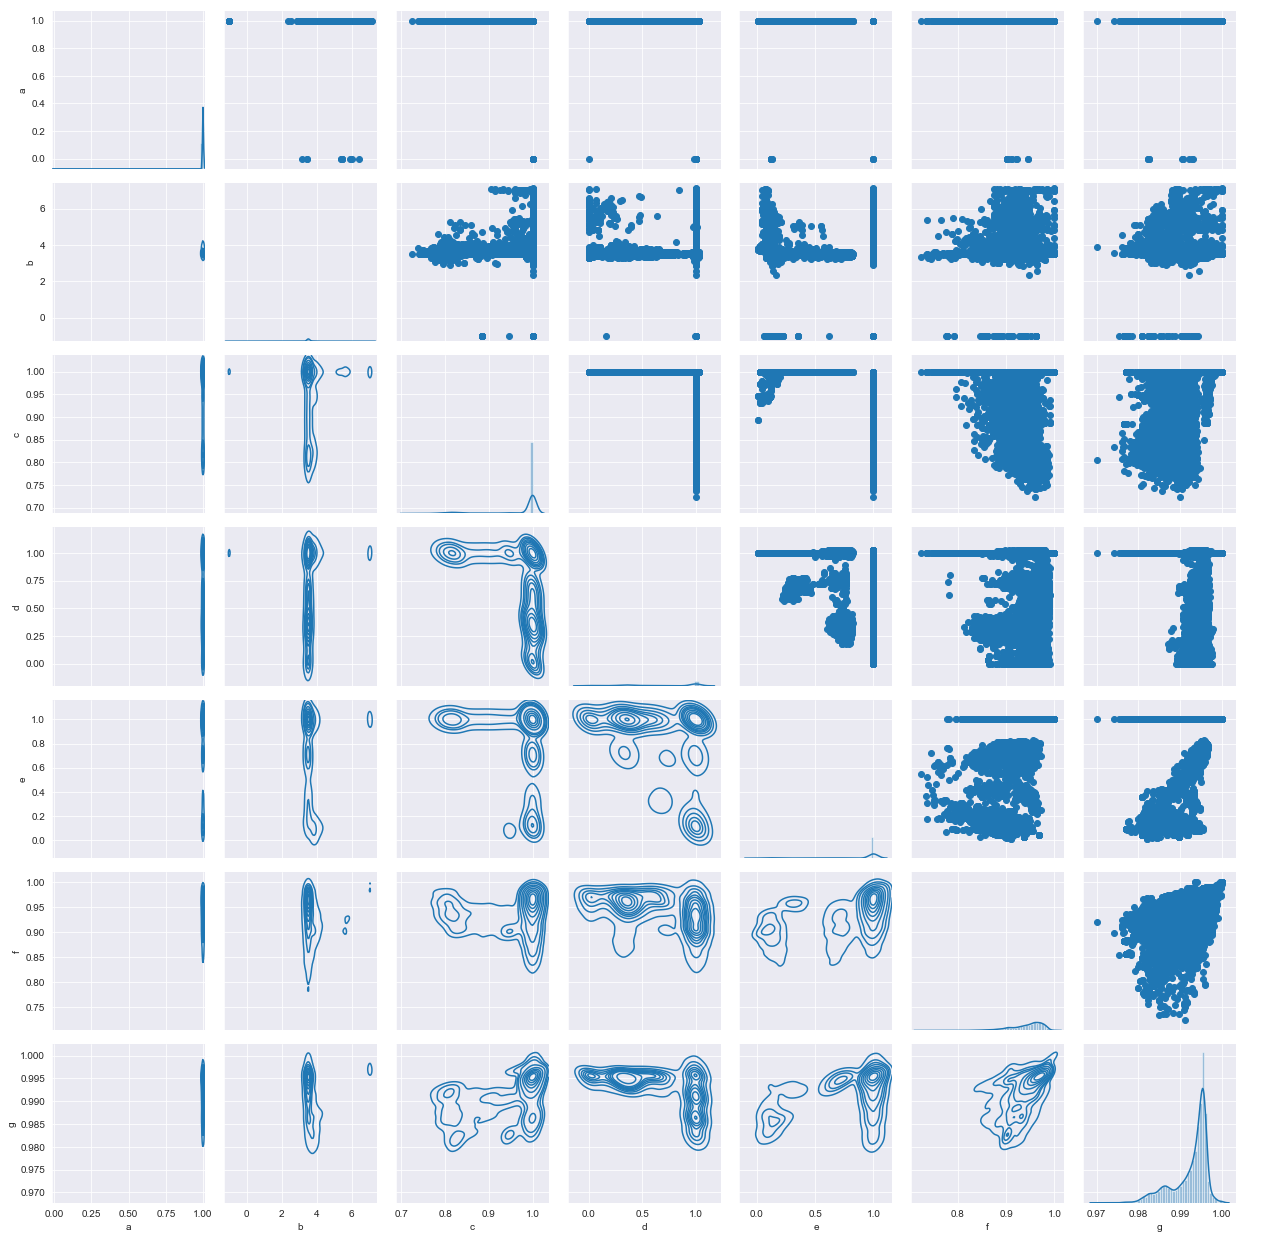

In [17]:
g = sns.PairGrid(data_result)
g.map_diag(sns.distplot)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)